In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
# Make sure 'winequality-red.csv' is in the same directory as your notebook,
# or provide the full path to the file.
df = pd.read_csv('WineQT.csv')

In [5]:
print("Dataset Shape:", df.shape) # Number of rows and columns
print("\nColumn Names and Data Types:\n", df.info()) # Information about columns and their types
print("\nFirst 5 Rows:\n", df.head()) # See the first few rows of your data
print("\nDescriptive Statistics:\n", df.describe()) # Get statistical summary of numerical columns

Dataset Shape: (1143, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

Column Names and Data Types:
 None

First 5 Rows

In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


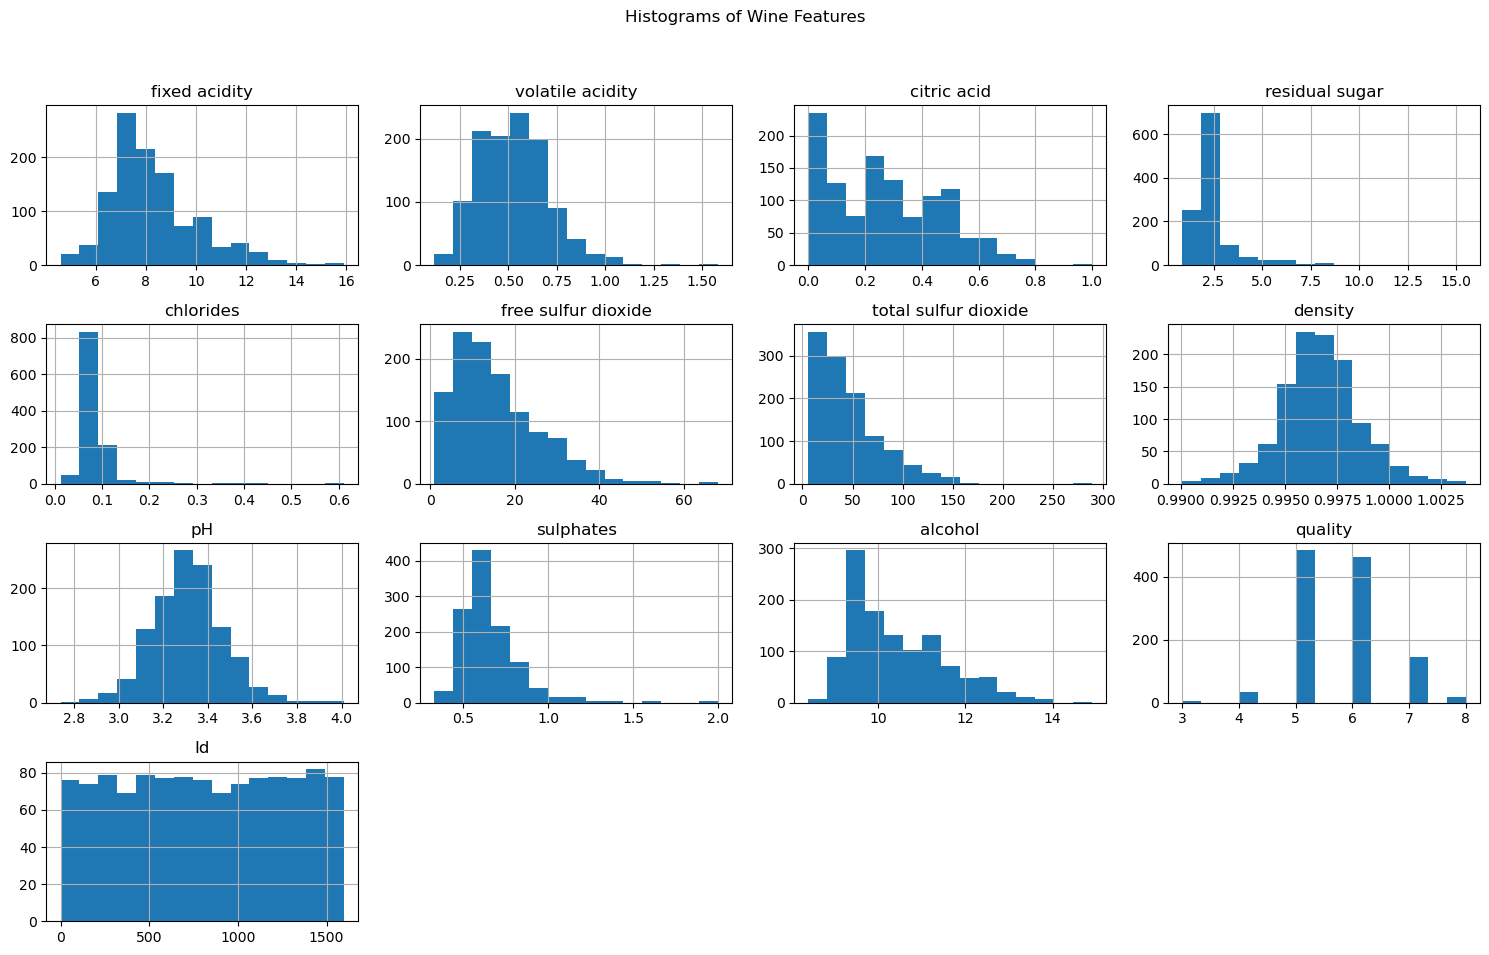

In [7]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Wine Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

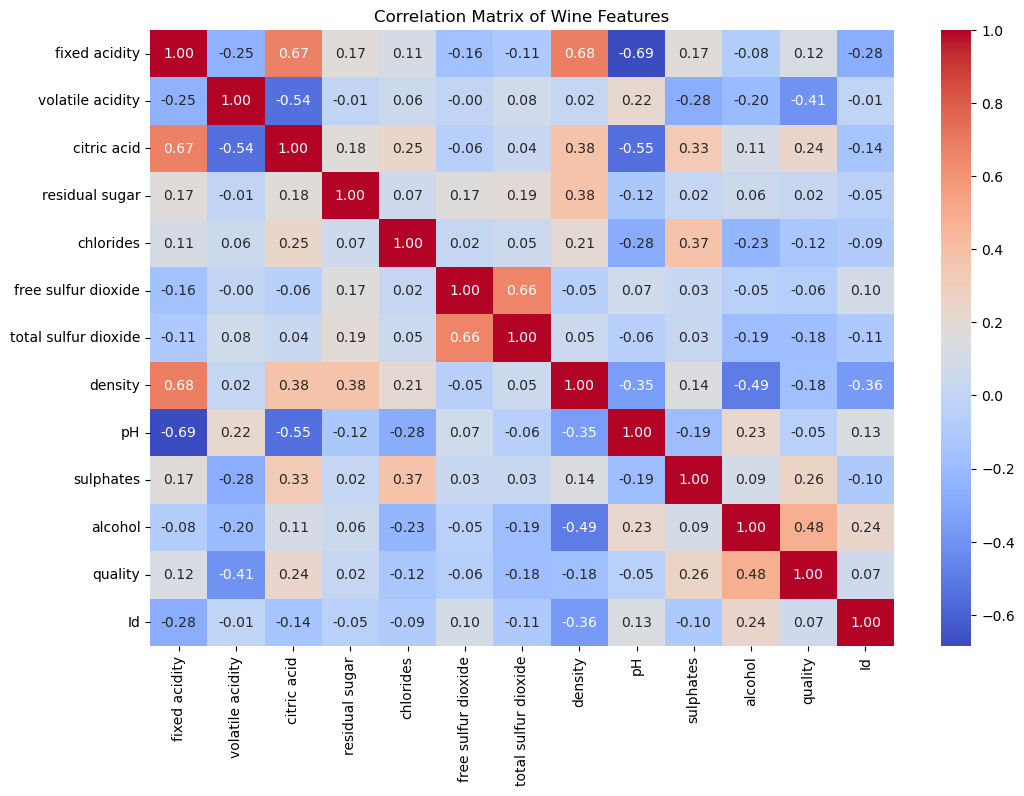

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

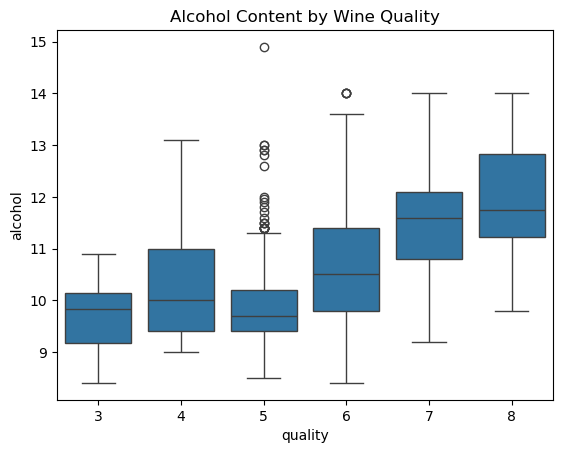

In [9]:
# Example for one feature, you can loop through others
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Content by Wine Quality')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1) # Features
y = df['quality'] # Target variable

# Split the data (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (914, 12)
X_test shape: (229, 12)
y_train shape: (914,)
y_test shape: (229,)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model 2: Logistic Regression
# It's good practice to scale features for Logistic Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000, random_state=42) # Increase max_iter for convergence
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5) # 5-fold cross-validation
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Average CV Score:", np.mean(rf_cv_scores))

# Cross-validation for Logistic Regression (use scaled data if performing here, or apply scaler within CV pipeline)
# For simplicity, let's do it on the scaled data for now
lr_cv_scores = cross_val_score(lr_model, scaler.fit_transform(X), y, cv=5) # Apply scaler to full X
print("\nLogistic Regression Cross-Validation Scores:", lr_cv_scores)
print("Logistic Regression Average CV Score:", np.mean(lr_cv_scores))


Random Forest Cross-Validation Scores: [0.44104803 0.54585153 0.59825328 0.56578947 0.53508772]
Random Forest Average CV Score: 0.5372060062820807

Logistic Regression Cross-Validation Scores: [0.51965066 0.5720524  0.6419214  0.57894737 0.5877193 ]
Logistic Regression Average CV Score: 0.5800582241630277


In [13]:
# Predictions on the test set
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate Random Forest
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Evaluate Logistic Regression
print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))


Random Forest Model Performance:
Accuracy: 0.6812227074235808
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229


Logistic Regression Model Performance:
Accuracy: 0.6375545851528385
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.63      0.64      0.63        99
           7       0.52      0.50      0.51        26
           8       0.00      0.00      0.00         2

    a

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\s

In [14]:
import pickle

# Assuming Random Forest is your best model
best_model = rf_model

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Also save the scaler if you used one for preprocessing and will use it for new predictions
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("\nModel and Scaler saved successfully!")


Model and Scaler saved successfully!
